<a href="https://colab.research.google.com/github/Dewanshu232/Churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = 'events.csv'  # Replace with the actual path
events = pd.read_csv("drive/MyDrive/okkkhizen/events.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(events.info())

print("\nFirst Few Rows:")
print(events.head())

print("\nMissing Values:")
print(events.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None

First Few Rows:
                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   


In [2]:
# Check for duplicate rows
duplicate_count = events.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any
events = events.drop_duplicates()
print(f"Shape after removing duplicates: {events.shape}")


Number of duplicate rows: 655
Shape after removing duplicates: (884474, 9)


In [3]:
# Convert event_time to datetime format
events['event_time'] = pd.to_datetime(events['event_time'], errors='coerce')

# Check if there are invalid datetime entries
invalid_datetime = events['event_time'].isnull().sum()
print(f"Invalid datetime entries: {invalid_datetime}")


Invalid datetime entries: 0


In [4]:
# Handle missing values
print("Missing values per column:")
print(events.isnull().sum())

# Drop or fill missing values as appropriate
# Example: Drop rows with missing event_time
events = events.dropna(subset=['event_time'])

# For other columns (like category_code, brand), consider filling with 'Unknown'
events['category_code'] = events['category_code'].fillna('Unknown')
events['brand'] = events['brand'].fillna('Unknown')

print(f"Shape after handling missing values: {events.shape}")


Missing values per column:
event_time            0
event_type            0
product_id            0
category_id           0
category_code    236047
brand            212232
price                 0
user_id               0
user_session        162
dtype: int64
Shape after handling missing values: (884474, 9)


In [5]:
# Extract additional time-based features
events['event_date'] = events['event_time'].dt.date
events['event_hour'] = events['event_time'].dt.hour


Event Type Distribution:
event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64


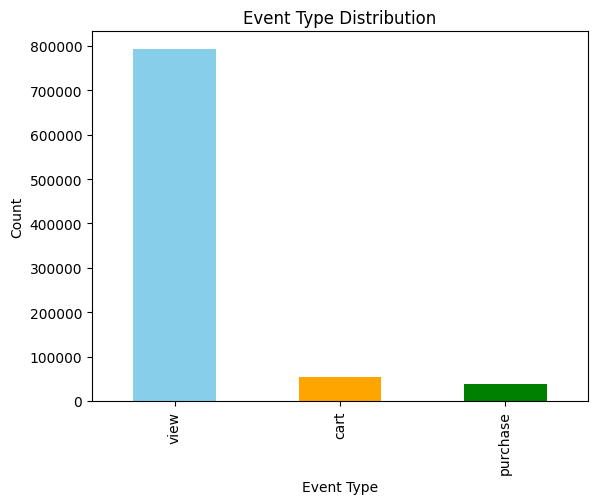

In [6]:
# Count the occurrences of each event type
event_type_distribution = events['event_type'].value_counts()
print("Event Type Distribution:")
print(event_type_distribution)

# Plot the distribution
import matplotlib.pyplot as plt

event_type_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()


Average events per user: 2.17
Median events per user: 1.0


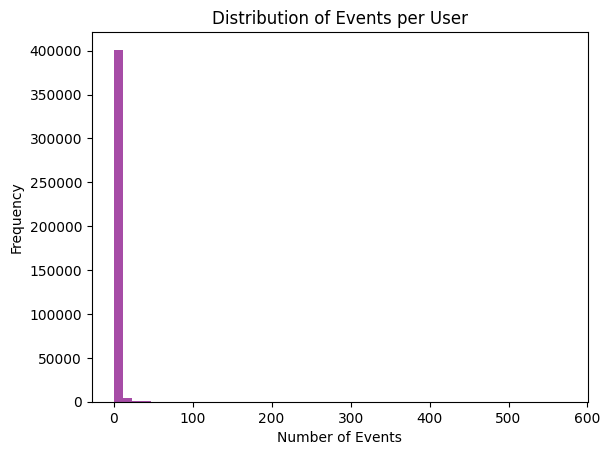

In [7]:
# Number of events per user
user_activity = events['user_id'].value_counts()
print(f"Average events per user: {user_activity.mean():.2f}")
print(f"Median events per user: {user_activity.median()}")

# Plot the distribution of events per user
plt.hist(user_activity, bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Events per User')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()


Top 10 Categories:
category_code
Unknown                             236047
computers.components.videocards     116611
electronics.telephone                84308
computers.peripherals.printer        43193
stationery.cartrige                  38699
electronics.audio.acoustic           26749
computers.components.motherboard     26585
computers.notebook                   25024
computers.components.cpu             24750
electronics.video.tv                 21373
Name: count, dtype: int64
Top 10 Brands:
brand
Unknown      212232
asus          27660
gigabyte      27652
msi           24864
palit         24787
samsung       23188
amd           20095
canon         18430
panasonic     11977
pioneer       11463
Name: count, dtype: int64


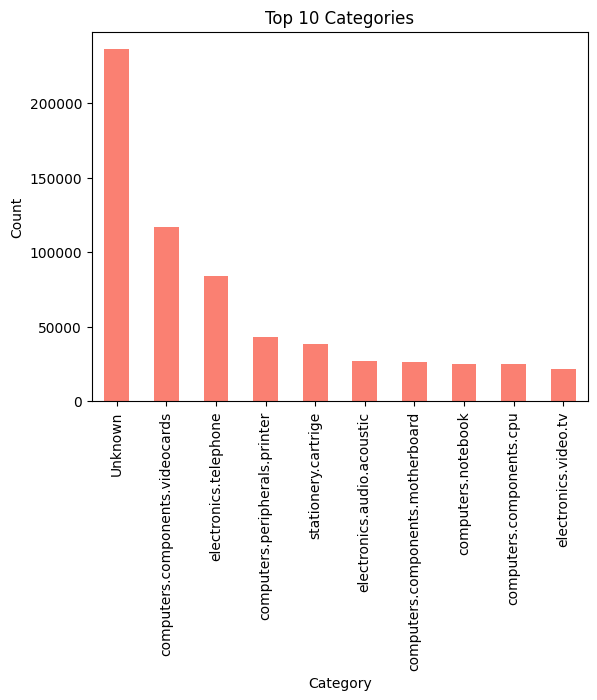

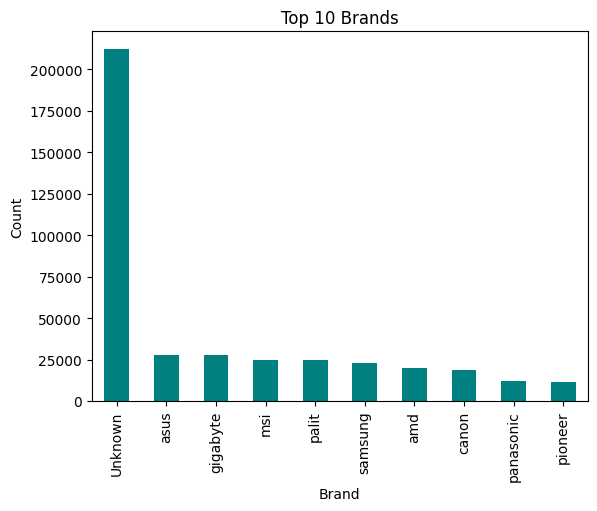

In [8]:
# Most popular categories
popular_categories = events['category_code'].value_counts().head(10)
print("Top 10 Categories:")
print(popular_categories)

# Most popular brands
popular_brands = events['brand'].value_counts().head(10)
print("Top 10 Brands:")
print(popular_brands)

# Plot popular categories
popular_categories.plot(kind='bar', color='salmon')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Plot popular brands
popular_brands.plot(kind='bar', color='teal')
plt.title('Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


Daily Event Counts:
event_date
2020-09-24    2263
2020-09-25    4239
2020-09-26    3464
2020-09-27    3850
2020-09-28    4712
              ... 
2021-02-24    5799
2021-02-25    5645
2021-02-26    5860
2021-02-27    4928
2021-02-28    5267
Name: event_type, Length: 158, dtype: int64


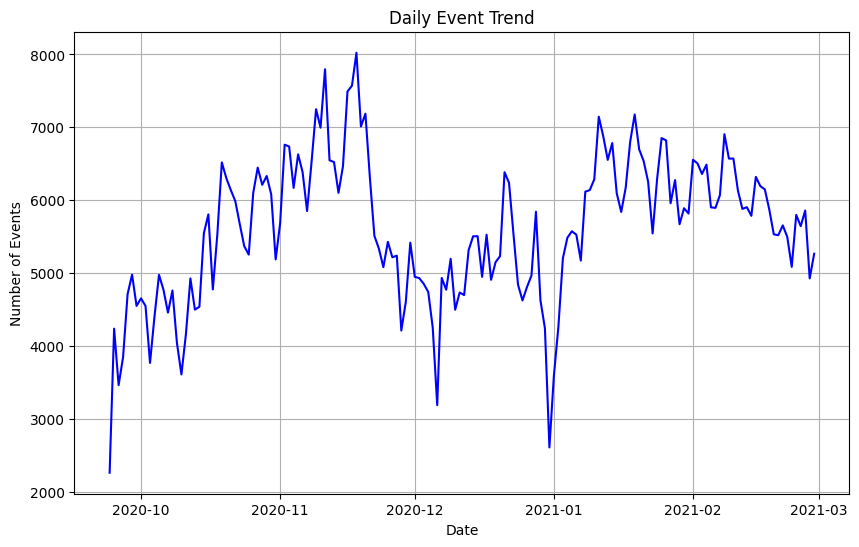

In [9]:
# Group by event_date to analyze activity over time
daily_events = events.groupby('event_date')['event_type'].count()
print("Daily Event Counts:")
print(daily_events)

# Plot daily events trend
daily_events.plot(kind='line', figsize=(10, 6), color='blue')
plt.title('Daily Event Trend')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid()
plt.show()


In [10]:
# Extract the latest event date from the dataset
current_date = events['event_time'].max()
print(f"Using {current_date} as the reference date for churn calculations.")


Using 2021-02-28 23:59:09+00:00 as the reference date for churn calculations.


In [11]:
# Aggregate user-level features
user_activity = events.groupby('user_id').agg(
    last_event=('event_time', 'max'),
    last_purchase=('event_time', lambda x: x[events.loc[x.index, 'event_type'] == 'purchase'].max() if not x.empty else None)
).reset_index()

# Calculate days since last event and last purchase
user_activity['days_since_last_event'] = (current_date - user_activity['last_event']).dt.days
user_activity['days_since_last_purchase'] = (current_date - user_activity['last_purchase']).dt.days

# Define churned users based on a threshold (e.g., 30 days for purchase-based churn)
user_activity['is_churned'] = user_activity['days_since_last_purchase'] > 30


In [12]:
# Calculate Recency (days since last event and last purchase)
user_activity = events.groupby('user_id').agg(
    last_event=('event_time', 'max'),
    last_purchase=('event_time', lambda x: x[events.loc[x.index, 'event_type'] == 'purchase'].max() if not x.empty else None)
).reset_index()

# Calculate days since last event and last purchase
user_activity['days_since_last_event'] = (current_date - user_activity['last_event']).dt.days
user_activity['days_since_last_purchase'] = (current_date - user_activity['last_purchase']).dt.days

# Define Recency metrics
user_activity['recency_last_event'] = user_activity['days_since_last_event']
user_activity['recency_last_purchase'] = user_activity['days_since_last_purchase']


In [13]:
# Aggregate user activity for Frequency metrics
user_metrics = events.groupby('user_id').agg(
    total_views=('event_type', lambda x: (x == 'view').sum()),
    total_carts=('event_type', lambda x: (x == 'cart').sum()),
    total_purchases=('event_type', lambda x: (x == 'purchase').sum()),
    total_spent=('price', 'sum')  # Sum of prices for purchases
).reset_index()

# View-to-cart ratio
user_metrics['view_to_cart_ratio'] = user_metrics['total_carts'] / user_metrics['total_views']

# Cart-to-purchase ratio
user_metrics['cart_to_purchase_ratio'] = user_metrics['total_purchases'] / user_metrics['total_carts']


In [14]:
# Session-level aggregation
session_metrics = events.groupby(['user_id', 'user_session']).agg(
    session_duration=('event_time', lambda x: (x.max() - x.min()).total_seconds()),  # Calculate session duration
    session_events=('event_type', 'count')  # Count number of events per session
).reset_index()

# User-level session metrics
user_session_metrics = session_metrics.groupby('user_id').agg(
    total_sessions=('user_session', 'nunique'),  # Count unique sessions per user
    avg_session_duration=('session_duration', 'mean'),  # Average session duration
    bounce_rate=('session_events', lambda x: (x == 1).sum() / len(x))  # Bounce rate
).reset_index()


In [15]:
# Most viewed/purchased category or brand
user_preferences = events.groupby('user_id').agg(
    most_viewed_category=('category_code', lambda x: x.value_counts().idxmax()),  # Most viewed category
    most_purchased_category=('category_code', lambda x: x[events.loc[x.index, 'event_type'] == 'purchase'].value_counts().idxmax() if any(events.loc[x.index, 'event_type'] == 'purchase') else None)  # Most purchased category - Handle empty sequence
).reset_index()

# Number of unique categories and brands interacted with
user_preferences['unique_categories'] = events.groupby('user_id')['category_code'].nunique()
user_preferences['unique_brands'] = events.groupby('user_id')['brand'].nunique()

In [16]:
# Calculate the time of day (hour of day) for each event
events['hour_of_day'] = events['event_time'].dt.hour

# User-level metrics: average hour of day for events
user_time_metrics = events.groupby('user_id')['hour_of_day'].mean().reset_index()


In [17]:
# Aggregate user-level features (to calculate is_churned)
user_activity_churn = events.groupby('user_id').agg(
    last_event=('event_time', 'max'),
    last_purchase=('event_time', lambda x: x[events.loc[x.index, 'event_type'] == 'purchase'].max() if not x.empty else None)
).reset_index()

# Calculate days since last event and last purchase
user_activity_churn['days_since_last_event'] = (current_date - user_activity_churn['last_event']).dt.days
user_activity_churn['days_since_last_purchase'] = (current_date - user_activity_churn['last_purchase']).dt.days

# Define churned users based on a threshold (e.g., 30 days for purchase-based churn)
user_activity_churn['is_churned'] = user_activity_churn['days_since_last_purchase'] > 30

# ... (rest of your code)

# Merge user-level features
final_features = user_metrics.merge(user_session_metrics, on='user_id', how='left')
final_features = final_features.merge(user_preferences, on='user_id', how='left')
final_features = final_features.merge(user_activity_churn[['user_id', 'is_churned']], on='user_id', how='left') # Use user_activity_churn to access 'is_churned'
final_features = final_features.merge(user_time_metrics, on='user_id', how='left')

# Final feature dataframe for modeling
print(final_features.head())

               user_id  total_views  total_carts  total_purchases  \
0  1515915625353226922            1            0                0   
1  1515915625353230067            1            0                0   
2  1515915625353230683           13            0                0   
3  1515915625353230922            1            0                0   
4  1515915625353234047           36            0                0   

   total_spent  view_to_cart_ratio  cart_to_purchase_ratio  total_sessions  \
0        76.48                 0.0                     NaN             1.0   
1        28.98                 0.0                     NaN             1.0   
2       814.93                 0.0                     NaN             4.0   
3       274.40                 0.0                     NaN             1.0   
4      5481.90                 0.0                     NaN             1.0   

   avg_session_duration  bounce_rate             most_viewed_category  \
0                   0.0          1.0       

In [22]:
# Check data types in X
print(X.dtypes)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


total_views                  int64
total_carts                  int64
total_purchases              int64
total_spent                float64
view_to_cart_ratio         float64
cart_to_purchase_ratio     float64
total_sessions             float64
avg_session_duration       float64
bounce_rate                float64
most_viewed_category        object
most_purchased_category     object
unique_categories          float64
unique_brands              float64
hour_of_day                float64
dtype: object
Non-numeric columns: Index(['most_viewed_category', 'most_purchased_category'], dtype='object')


In [23]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encode non-numeric columns
for col in non_numeric_columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


In [24]:
# Replace inf and -inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0 or another appropriate value
X.fillna(0, inplace=True)

# Clip extremely large values
X = np.clip(X, -1e10, 1e10)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

# Ensure X is a DataFrame
X = final_features.drop(['user_id', 'is_churned'], axis=1)
y = final_features['is_churned']

# Check for non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric using Label Encoding
for col in non_numeric_columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Replace inf and -inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values
X.fillna(0, inplace=True)

# Clip large values
X = np.clip(X, -1e10, 1e10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


Non-numeric columns: Index(['most_viewed_category', 'most_purchased_category'], dtype='object')
Class distribution in training set:
is_churned
False    0.959346
True     0.040654
Name: proportion, dtype: float64
              precision    recall  f1-score   support

       False       1.00      0.99      0.99     78146
        True       0.79      0.96      0.87      3311

    accuracy                           0.99     81457
   macro avg       0.89      0.97      0.93     81457
weighted avg       0.99      0.99      0.99     81457



In [26]:
# Get information about the training and testing data
print("Training Data Information:")
X_train.info()  # Information about X_train features
print("\nTesting Data Information:")
X_test.info()   # Information about X_test features

# Basic statistics of the training and testing data (for numeric columns)
print("\nTraining Data Description:")
print(X_train.describe())  # Summary statistics for X_train
print("\nTesting Data Description:")
print(X_test.describe())   # Summary statistics for X_test


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 325826 entries, 181071 to 266492
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_views              325826 non-null  int64  
 1   total_carts              325826 non-null  int64  
 2   total_purchases          325826 non-null  int64  
 3   total_spent              325826 non-null  float64
 4   view_to_cart_ratio       325826 non-null  float64
 5   cart_to_purchase_ratio   325826 non-null  float64
 6   total_sessions           325826 non-null  float64
 7   avg_session_duration     325826 non-null  float64
 8   bounce_rate              325826 non-null  float64
 9   most_viewed_category     325826 non-null  int64  
 10  most_purchased_category  325826 non-null  int64  
 11  unique_categories        325826 non-null  float64
 12  unique_brands            325826 non-null  float64
 13  hour_of_day              325826 

In [30]:


from sklearn.metrics import roc_auc_score, classification_report

# Predict probabilities on the test set
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Get performance metrics
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"Random Forest AUC: {auc_rf}")
print(classification_report(y_test, rf.predict(X_test)))


Random Forest AUC: 0.9950613973242458
              precision    recall  f1-score   support

       False       1.00      0.99      0.99     78146
        True       0.79      0.96      0.87      3311

    accuracy                           0.99     81457
   macro avg       0.89      0.97      0.93     81457
weighted avg       0.99      0.99      0.99     81457



In [29]:
# ipython-input-28-d87f99058357
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report # Import roc_auc_score and classification_report

# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Get performance metrics
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print(f"Gradient Boosting AUC: {auc_gb}")
print(classification_report(y_test, gb.predict(X_test)))

Gradient Boosting AUC: 0.9953835413571186
              precision    recall  f1-score   support

       False       1.00      0.99      0.99     78146
        True       0.78      1.00      0.88      3311

    accuracy                           0.99     81457
   macro avg       0.89      0.99      0.94     81457
weighted avg       0.99      0.99      0.99     81457



In [31]:
model_comparison = pd.DataFrame({
    'Model': [ 'Random Forest', 'Gradient Boosting'],
    'AUC': [ auc_rf, auc_gb]
})

print(model_comparison)

               Model       AUC
0      Random Forest  0.995061
1  Gradient Boosting  0.995384


In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get best parameters and best AUC score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best AUC for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best AUC for Random Forest: 0.9952831305016753


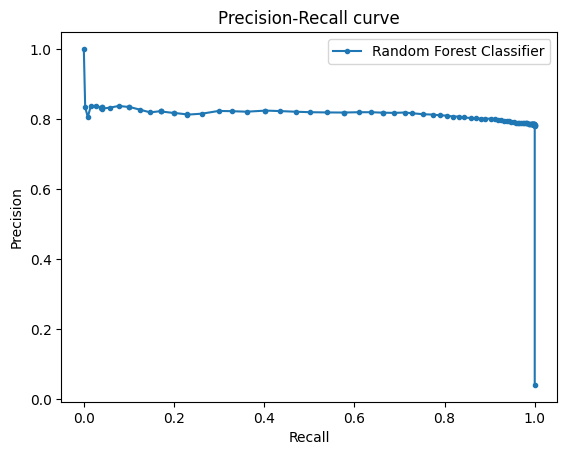

In [33]:
from sklearn.metrics import precision_recall_curve

# Example: Precision-Recall curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rf)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, marker='.', label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()


In [34]:
# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_rf.head())

                    Feature  Importance
10  most_purchased_category    0.245035
2           total_purchases    0.228856
5    cart_to_purchase_ratio    0.201416
1               total_carts    0.063617
7      avg_session_duration    0.059882


In [35]:
import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(rf, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']

In [36]:
# Get churn probabilities for the test set
y_prob = rf.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)

# Create a DataFrame with user IDs and predicted probabilities
user_predictions = pd.DataFrame({
    'user_id': final_features.loc[X_test.index, 'user_id'],  # Fetch corresponding user IDs
    'churn_probability': y_prob
})


In [40]:
# Sort users by churn probability
most_likely_to_churn = user_predictions.sort_values(by='churn_probability', ascending=False)

# Display top 10 users most likely to churn
print(most_likely_to_churn.head(50))


                    user_id  churn_probability
68576   1515915625528282178               1.00
146624  1515915625539171642               1.00
402580  1515915625610114668               1.00
324480  1515915625596998528               1.00
155561  1515915625540182859               1.00
291622  1515915625592424452               1.00
396679  1515915625609026326               1.00
21630   1515915625521439826               1.00
316035  1515915625595774550               1.00
209883  1515915625554765762               1.00
195314  1515915625546757435               1.00
69677   1515915625528413599               1.00
322083  1515915625596623917               0.99
128069  1515915625537064656               0.99
69344   1515915625528373566               0.99
1537    1515915625405842034               0.99
379154  1515915625606125849               0.99
392532  1515915625608351631               0.99
92805   1515915625531426466               0.99
122973  1515915625536434201               0.99
201319  15159

In [38]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test, random_state=42)
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)
print(feature_importances)


                    feature  importance
10  most_purchased_category    0.016158
2           total_purchases    0.009367
5    cart_to_purchase_ratio    0.000687
7      avg_session_duration    0.000076
13              hour_of_day    0.000032
11        unique_categories    0.000000
12            unique_brands    0.000000
0               total_views   -0.000189
6            total_sessions   -0.000199
1               total_carts   -0.000250
8               bounce_rate   -0.000282
3               total_spent   -0.000459
4        view_to_cart_ratio   -0.000506
9      most_viewed_category   -0.000660
